In [13]:
# We made the imports for you
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import geopandas as gpd
from shapely import wkt
from bokeh.io import output_notebook, show, output_file
from bokeh.plotting import figure
from bokeh.models import GeoJSONDataSource, ColumnDataSource
import json
from bokeh.models import HoverTool

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/maelfabien/COVID-19-Senegal/master/COVID_Senegal.csv", sep=";")
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)

df.head()

,Date,Positif,Negatif,Age,Homme,Femme,Décédé,Guéri,Nationalité,Resident Senegal,Ville,Facteur,Source/Voyage,Hopital,Temps Hospitalisation (j)
0,2020-03-02,1,0,68.0,1.0,0.0,0.0,1.0,France,Oui,Dakar,Importé,France,FANN,4.0
1,2020-03-03,0,1,NaN,1.0,0.0,0.0,1.0,Gambie,Non,Dakar,Importé,Espagne,FANN,NaN
2,2020-03-03,1,0,80.0,1.0,0.0,0.0,1.0,France,Non,Dakar,Importé,France,FANN,10.0
3,2020-03-04,1,0,68.0,0.0,1.0,0.0,1.0,France,Non,Dakar,Importé,France,FANN,15.0
4,2020-03-04,1,0,33.0,0.0,1.0,0.0,1.0,Angleterre,Non,Dakar,Importé,Angleterre,FANN,7.0


In [3]:
summary = df[['Positif', 'Ville']].groupby("Ville").sum().reset_index()
summary

,Ville,Positif
0,Dakar,18
1,Diourbel,1
2,Nianing,1
3,Saint Louis,1
4,Thies,1
5,Touba,12
6,Ziguinchor,1


In [18]:
cities = pd.read_csv("/content/sample_data/city_coordinates.csv", index_col=0)

def find_lat(x):
    try:
        return float(cities[cities['Ville'] == x]['Latitude'])
    except TypeError:
        return None

def find_long(x):
    try:
        return float(cities[cities['Ville'] == x]['Longitude'])
    except TypeError:
        return None

summary = df[['Positif', 'Ville']].groupby("Ville").sum().reset_index()
summary['latitude'] = summary['Ville'].apply(lambda x: find_lat(x))
summary['longitude'] = summary['Ville'].apply(lambda x: find_long(x))


In [23]:
shapefile = '/content/sample_data/ne_110m_admin_0_countries.shp'
gdf = gpd.read_file(shapefile)[['ADMIN', 'ADM0_A3', 'geometry']]
gdf.columns = ['country', 'country_code', 'geometry']
gdf = gdf[gdf['country'] == "Senegal" ]

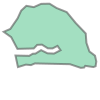

In [24]:
gdf['geometry'][51]

In [25]:
grid_crs=gdf.crs
gdf_json = json.loads(gdf.to_json())
grid = json.dumps(gdf_json)
geosource = GeoJSONDataSource(geojson = grid)

In [26]:
from bokeh.io import output_notebook
output_notebook()

In [27]:
p = figure(plot_height = 550 , plot_width = 700)

p.patches('xs','ys', source = geosource, fill_color = 'lightgrey',
          line_color = 'black', line_width = 0.25, fill_alpha = 1)
p.xgrid.grid_line_color = None
p.ygrid.grid_line_color = None
p.xaxis.visible = False
p.yaxis.visible = False
p.outline_line_color = None

show(p)

In [28]:
p = figure(plot_height = 550 , plot_width = 700)

p.patches('xs','ys', source = geosource, fill_color = 'lightgrey',
          line_color = 'black', line_width = 0.25, fill_alpha = 1)
p.xgrid.grid_line_color = None
p.ygrid.grid_line_color = None
p.xaxis.visible = False
p.yaxis.visible = False
p.outline_line_color = None

show(p)

In [29]:
pointsource = ColumnDataSource(summary)

In [30]:
hover = HoverTool(
    tooltips = [('Ville', '@Ville'), ('Nombre de cas positifs (au moins)', '@Positif')]
)

p = figure(plot_height = 550 , plot_width = 700, tools=[hover, 'pan', 'wheel_zoom'])
p.xgrid.grid_line_color = None
p.ygrid.grid_line_color = None
p.xaxis.visible = False
p.yaxis.visible = False
p.outline_line_color = None

p.patches('xs','ys', source = geosource, fill_color = 'lightgrey',
          line_color = 'black', line_width = 0.25, fill_alpha = 1)

p.circle('longitude','latitude',source=pointsource, size='Positif')

show(p)